In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
treino = pd.read_csv("dataset_treino_smt.csv")
teste = pd.read_csv("dataset_teste_ajustado.csv")

In [3]:
features = list(treino.columns.drop('classe'))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(treino.loc[:, features], treino['classe'], test_size=0.33, random_state=42)

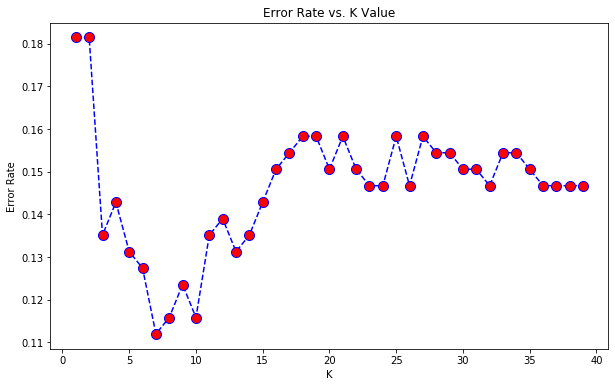

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i, p=1, weights='distance')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')

In [8]:
pred = knn.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test,pred))

[[104  27]
 [  7 121]]


In [10]:
from sklearn.metrics import classification_report
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       131
           1       0.82      0.95      0.88       128

    accuracy                           0.87       259
   macro avg       0.88      0.87      0.87       259
weighted avg       0.88      0.87      0.87       259



In [11]:
from sklearn.tree import DecisionTreeClassifier
random_state=234
dtree = DecisionTreeClassifier(random_state=998)

dtree.fit(X_train,y_train)

pred = dtree.predict(X_test)
print (classification_report(y_test,pred))
print (confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       131
           1       0.83      0.86      0.85       128

    accuracy                           0.85       259
   macro avg       0.85      0.85      0.85       259
weighted avg       0.85      0.85      0.85       259

[[109  22]
 [ 18 110]]


In [12]:
from sklearn.ensemble import RandomForestClassifier

# number of base decision tree estimators
n_est = 100
# maximum depth of any given decision tree estimator
max_depth = 5
# random state variable
rstate = 42
# initialize a random forest algorithm

rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_depth, random_state=rstate)

rf.fit(X_train,y_train)
pred = rf.predict(X_test)


print('Confusion Matrix')
cm_rf = confusion_matrix(y_test,pred)
print(cm_rf)
print('\n')
rpt_rf = classification_report(y_test,pred)
print(rpt_rf)

Confusion Matrix
[[110  21]
 [ 14 114]]


              precision    recall  f1-score   support

           0       0.89      0.84      0.86       131
           1       0.84      0.89      0.87       128

    accuracy                           0.86       259
   macro avg       0.87      0.87      0.86       259
weighted avg       0.87      0.86      0.86       259



In [13]:
features = [col for col in list(X_train) ]
print('%i features: %s' % (len(features), features))

importances =  rf.feature_importances_
descending_indices = np.argsort(importances)[::-1]
sorted_importances = [importances[idx] for idx in descending_indices]
sorted_features = [features[idx] for idx in descending_indices]
print('Most important feature for diabetes energy is %s' % sorted_features[0])

8 features: ['num_gestacoes', 'glicose', 'pressao_sanguinea', 'grossura_pele', 'insulina', 'bmi', 'indice_historico', 'idade']
Most important feature for diabetes energy is insulina


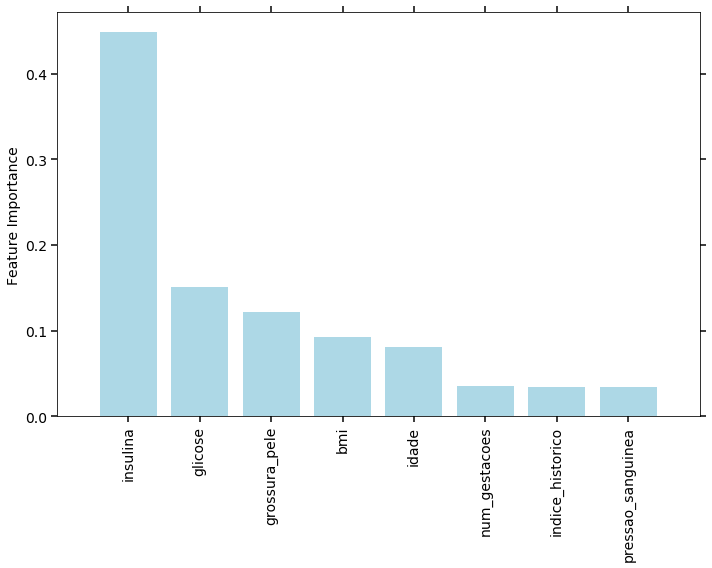

In [14]:
def plot_importances(X_train, sorted_features, sorted_importances):
    """
    Args:
        X_train (nd-array) - feature matrix of shape (number samples, number features)
        sorted_features (list) - feature names (str)
        sorted_importances (list) - feature importances (float)
    Returns:
        matplotlib bar chart of sorted importances
    """
    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 14
    bar_color = 'lightblue'
    align = 'center'
    label = '__nolegend__'
    ax = plt.bar(range(X_train.shape[1]), sorted_importances,
                 color=bar_color, align=align, label=label)
    ax = plt.xticks(range(X_train.shape[1]), sorted_features, rotation=90)
    ax = plt.xlim([-1, X_train.shape[1]])
    ax = plt.ylabel('Feature Importance', fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, 
                         which='major', right=True, top=True)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tight_layout()
    return ax

fig1 = plt.figure(1, figsize=(10,8))

ax = plot_importances(X_train, sorted_features, sorted_importances)

# plt.tight_layout()
plt.show()
plt.close()

In [15]:
teste.head()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade
0,1,-0.863943,-0.539336,1.157383,-1.299796,-0.259334,-0.858156,-0.125604,-0.791337
1,2,0.593310,-0.942338,-0.130301,-0.036105,-0.259334,-1.380568,-0.809234,-0.444450
2,3,-0.863943,-0.001999,0.030659,0.848478,-0.259334,-0.750601,-1.102218,-0.271006
3,4,0.884761,0.871173,0.352580,-0.036105,-0.194128,0.386413,0.824968,1.810320
4,5,0.010409,1.979430,-0.130301,-0.036105,-0.259334,-0.658410,-0.737615,0.249326


In [16]:
pred1 = knn.predict(teste[features])
pred2 = rf.predict(teste[features])
pred3 = dtree.predict(teste[features])

predictions = [pred1, pred2, pred3]

for i in predictions:
    print(sum(i))

87
99
69


In [17]:
resposta = pd.DataFrame({"id":teste["id"].values})
resposta["classe"] = pred1
resposta.to_csv("./resp_knn.csv", index=False)

In [18]:
resposta = pd.DataFrame({"id":teste["id"].values})
resposta["classe"] = pred2
resposta.to_csv("./resp_rf.csv", index=False)

In [19]:
resposta = pd.DataFrame({"id":teste["id"].values})
resposta["classe"] = pred3
resposta.to_csv("./resp_dtree.csv", index=False)